In [165]:
from plotnine import ggplot, geom_point, aes, stat_smooth,geom_bar, xlim, ylim, facet_wrap, theme_bw, geom_line, geom_tile
import plotnine as pn
from plotnine.data import mtcars
import pandas as pd
import numpy as np


In [45]:
data=pd.DataFrame({'x':np.arange(0,100,0.1),'y':np.sin(np.arange(0,100,0.1))})

In [50]:
p=(ggplot(data, aes(x='x', y='y'))
 + geom_line()+pn.theme_bw()+pn.theme(aspect_ratio=0.1,dpi=300))

In [53]:
from pytexshade import ipyshade
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

In [54]:
#Prepare a Multiple Sequence Alignment in biopython
human_h2a_z_core=Seq('SRSQRAGLQFPVGRIHRHLKSRTTSHGRVGATAAVYSAAILEYLTAEVLELAGNASKDLKVKRITPRHLQLAIRGDEELDSLI-KATIAGGGVIPHIHKSLIG')
xenopus_h2a_core=Seq('TRSSRAGLQFPVGRVHRLLRKGNYAE-RVGAGAPVYLAAVLEYLTAEILELAGNAARDNKKTRIIPRHLQLAVRNDEELNKLLGRVTIAQGGVLPNIQSVLLP')
msa=MultipleSeqAlignment([SeqRecord(xenopus_h2a_core,id='H2A',name='H2A'),SeqRecord(human_h2a_z_core,id='H2AZ',name='H2AZ')])

In [137]:
len(human_h2a_z_core)

103

In [180]:
#Shade
s=ipyshade.shadedmsa(msa,\
     shading_modes=['charge_functional'],# list of shading modes according to TexShade, supported are "similar", "hydropathy_functional", "chemical_functional", "structure_functional", "charge_functional", "diverse"\
     legend=False,features=[],title='',\
     logo=False, #SeqLogo \
     hideseqs=False,#activate \hidseqs command \ 
     splitN=20, #alignment will be split into splitN batches\
     setends=[], # a section of alignment will be displayed between setends[0] and setends[1]\
     ruler=False, # Add a ruler\
     show_seq_names=False,# Show sequence names\
     funcgroups=None, # Hilight functional groups, Tex code should be inserted example funcgroups="\\funcgroup{xxx}{CT}{White}{Green}{upper}{up} \\funcgroup{yyy}{GA}{White}{Blue}{upper}{up}" \
     show_seq_length=False, #Show sequence length \
     density=150
    )

In [181]:
import matplotlib.image as mpimg
import io
import matplotlib.pyplot as plt


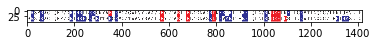

In [182]:
d=mpimg.imread(io.BytesIO(s.img))
plt.imshow(d)

In [183]:
d.shape

(48, 1416, 3)

In [184]:
from matplotlib.colors import to_hex

In [185]:
pict=pd.DataFrame([(i[1],d.shape[0]-i[0],to_hex(d[i])) for i in np.ndindex(d.shape[0],d.shape[1])],columns=['x','y','c'])

In [186]:
data=pd.DataFrame({'x':np.arange(103),'y':np.sin(np.arange(103))})

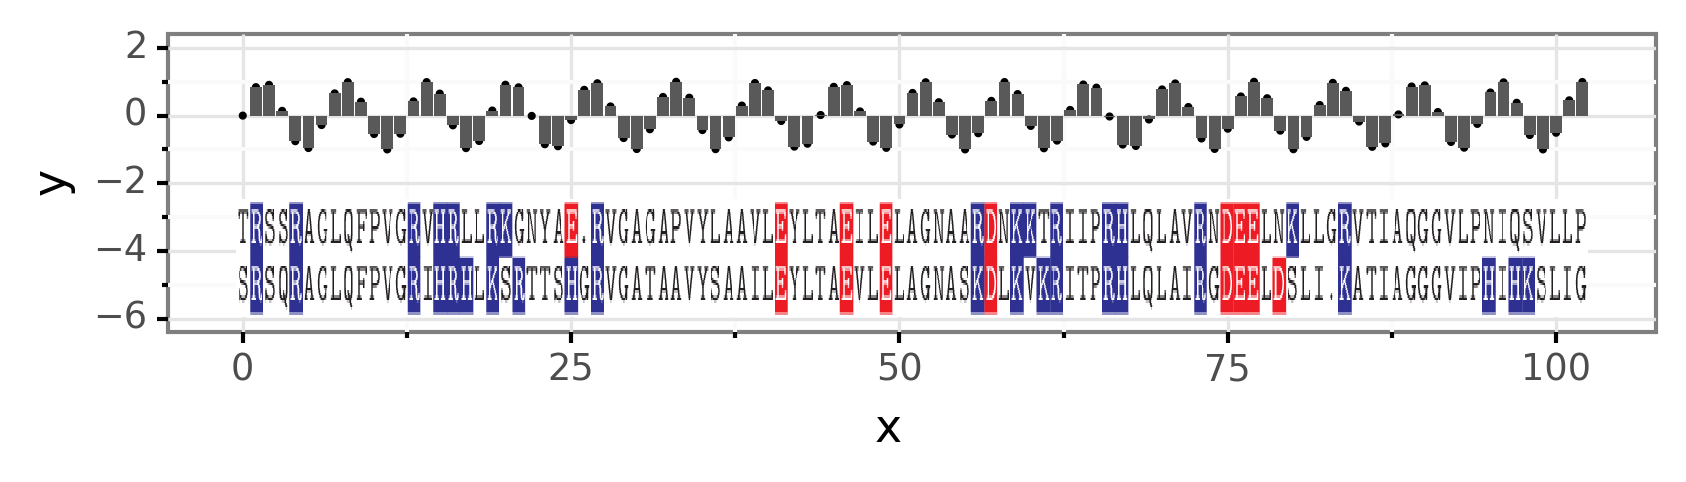

<ggplot: (8753715542760)>

In [187]:
(ggplot(data, aes(x='x', y='y'))
 + geom_point(size=0.1)+geom_bar(stat='identity')+pn.theme_bw()+pn.theme(aspect_ratio=0.2,dpi=300)
+ geom_tile(data=pict,mapping=aes(x='x*103./1416.-0.5', y='y*103./1416.-6'),fill=pict['c']))+ylim(-6,2)